In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





In [94]:
data = pd.read_csv('EEG_Eye_State.csv')

In [95]:
data2=data.drop("eyeDetection",axis=1)

In [96]:
def remove_outliers_iqr(data, column):
    # Calculate the first quartile and the third quartile
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    # Calculate the IQR
    iqr = q3 - q1
    # Calculating the thrshold
    threshold = 3 * iqr
    # Defining the lower and upper bounds
    lower_bound = q1 - threshold
    upper_bound = q3 + threshold
    # Filtering and returning the filtered data
    filtered_data = data[(data[column] >= lower_bound) &
                         (data[column] <= upper_bound)]
    return filtered_data


# Let's apply our previous method and save the new filtered data
for q in data2.columns:
    data2 = remove_outliers_iqr(data2, q)

# Taking a look at our filtered data
data2

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77


In [97]:
eeg_data = data2[['FC5']]
count=eeg_data.count(axis=0).values[0]
time_interval = round(117/count,5)

x_axis = np.linspace(0, 117,count)

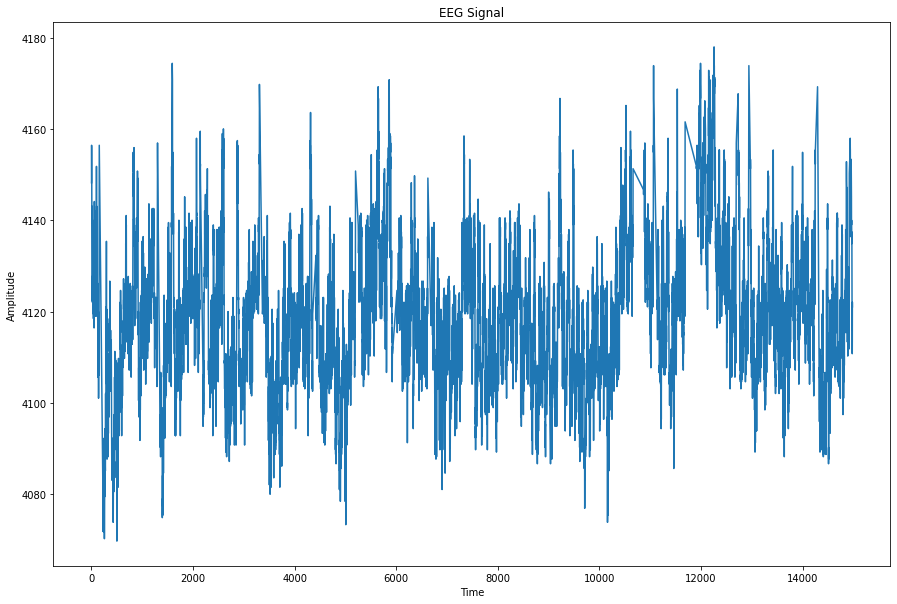

In [98]:
plt.figure(figsize=(15, 10))
plt.plot(eeg_data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG Signal')
plt.show()
